In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score

# 모델 학습
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

# 성능 평가
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import silhouette_score

# 경고 메세지 숨김
import warnings     
warnings.filterwarnings('ignore')

In [3]:
# 농어 길이, 무게
perch_length = [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0]

perch_weight = [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0]

# 산점도

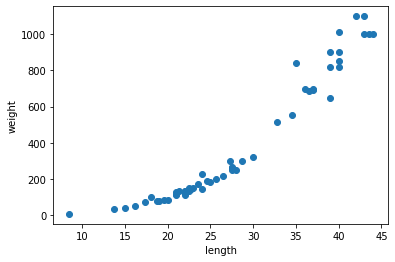

In [4]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 데이터 분할

In [5]:
data = np.array( perch_length )       # 독립변수
target = np.array( perch_weight )     # 종속변수

xtrain, xtest, ytrain, ytest = train_test_split(
    data, target             # x: 독립변수, y: 종속변수＆정답
    , random_state = 42     # 랜덤 시드
    )

xtrain = xtrain.reshape(-1,1)
xtest = xtest.reshape(-1,1)

print(xtrain.shape, xtest.shape)

(42, 1) (14, 1)


# K-최근접 이웃 - 단점
+ 훈련 데이터 범위 밖의 샘플 예측X

In [6]:
knr = KNeighborsRegressor(
    n_neighbors = 3    # 하이퍼 파라미터
    )     # 모델 생성

knr.fit( xtrain, ytrain )    # 모델 학습

# 훈련 데이터 범위 이탈
print(knr.predict([[50]]))
print(knr.predict([[100]]))

[1033.33333333]
[1033.33333333]


### 산점도

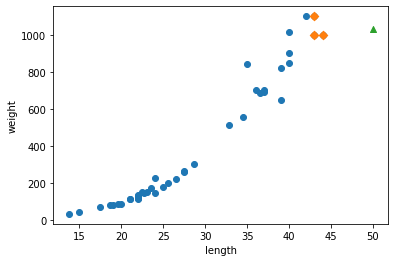

In [14]:
distances, indexes = knr.kneighbors([[50]]) # 50cm 농어 - 최근접 이웃까지의 거리, 최근접 이웃 인덱스

plt.scatter(xtrain, ytrain)

plt.scatter(xtrain[indexes], ytrain[indexes], marker='D') # 50cm 농어 - 최근접 이웃

plt.scatter(50, 1033, marker='^') # 50cm 농어 데이터

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 선형 회귀

In [15]:
lr = LinearRegression()     # 모델 생성

lr.fit( xtrain, ytrain )    # 모델 학습

# (회귀)변수.score( xtrain, ytrain )    # 훈련 데이터 정확도(≒결정계수)
# (회귀)변수.score( xtest, ytest )      # 테스트 데이터 정확도(≒결정계수)

# lr.coef_          # 기울기  
# lr.intercept_     # 절편

print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


In [17]:
lr.predict([[50]])

array([1241.83860323])

In [8]:
lr.score( xtrain, ytrain )    # 훈련 데이터 정확도(≒결정계수)

0.939846333997604

In [9]:
lr.score( xtest, ytest )      # 테스트 데이터 정확도(≒결정계수)

0.8247503123313558

### 과소적합